Teleportation


Quantum teleportation, or just teleportation for short, is a protocol where a sender (Alice) transmits a qubit to a receiver (Bob) by making use of a shared entangled quantum state (one e-bit, to be specific) along with two bits of classical communication. The name teleportation is meant to be suggestive of the concept in science fiction where matter is transported from one location to another by a futuristic process, but it must be understood that matter is not teleported in quantum teleportation — what is actually teleported is quantum information.



Qiskit implementation

In [23]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

Here is a quantum circuit implementation of the teleportation protocol.

In [24]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw())

░      ┌───┐ ░    ┌─┐ ░                                     »
  Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────────────────»
     ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                                     »
  A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────────────────»
     └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐»
  B: ─────┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├»
          └───┘ ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘»
                                ║  ║    ┌──╨──┐                   ║         »
a: 1/═══════════════════════════╩══╬════╡ 0x1 ╞═══════════════════╬═════════»
                                0  ║    └─────┘                ┌──╨──┐      »
b: 1/══════════════════════════════╩═══════════════════════════╡ 0x1 ╞══════»
                                   0                           └─────┘      »
«               
«  Q: ──────────
«               
«  A: ──────────
«      ───────┐ 
«  B:   End-0 ├─
«      ───────┘ 
«a: 1/══════════
«               
«b: 1/══════════
«

In [25]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(ramdom_gate.to_matrix())

array([[0.8969364 +0.j        , 0.37396079-0.23592038j],
       [0.14548043-0.41754107j, 0.20233289+0.87381709j]])

Now we'll create a new testing circuit that first applies our random gate to Q, then runs the teleportation circuit, and finally applies the inverse of our random gate to the qubit B and measures. The outcome should be 0 with certainty.

In [26]:
# Create a new circuit includeing the same bits and qubits used in the teleportaiton protocal.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

#Start with the randomlu selected gate on Q

test.append(random_gate, qubit)
test.barrier()

#Append the entire telepotion protocal from above.
test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw())


┌──────────────────────────┐ ░            ░      ┌───┐ ░    ┌─┐ ░ »
       Q: ┤ U(1.2719,0.15531,5.6815) ├─░────────────░───■──┤ H ├─░────┤M├─░─»
          └──────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░ »
       A: ─────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─»
                                       ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ »
       B: ─────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                       ░      └───┘ ░            ░  ║  ║  ░ »
     a: 1/══════════════════════════════════════════════════════════╩══╬════»
                                                                    0  ║    »
     b: 1/═════════════════════════════════════════════════════════════╩════»
                                                                       0    »
Result: 1/══════════════════════════════════════════════════════════════════»
                                                                            »
«                                                         ░ »
«       Q: ───────────────────────────────────────────────░─»
«                                                         ░ »
«       A: ───────────────────────────────────────────────░─»
«          ┌────── ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ »
«       B: ┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─»
«          └──╥─── └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ »
«          ┌──╨──┐                   ║                      »
«     a: 1/╡ 0x1 ╞═══════════════════╬══════════════════════»
«          └─────┘                ┌──╨──┐                   »
«     b: 1/═══════════════════════╡ 0x1 ╞═══════════════════»
«                                 └─────┘                   »
«Result: 1/═════════════════════════════════════════════════»
«                                                           »
«                                            
«       Q: ──────────────────────────────────
«                                            
«       A: ──────────────────────────────────
«          ┌─────────────────────────────┐┌─┐
«       B: ┤ U(-1.2719,-5.6815,-0.15531) ├┤M├
«          └─────────────────────────────┘└╥┘
«     a: 1/════════════════════════════════╬═
«                                          ║ 
«     b: 1/════════════════════════════════╬═
«                                          ║ 
«Result: 1/════════════════════════════════╩═
«                                          0

let's run the Aer simulator on this circuit and plot a histogram of the outputs. We'll see the statistics for all three classical bits: the bottom/leftmost bit should always be 
,
0, indicating that the qub
�
Q was successfully teleportedo
�
,
B, while the other two bits should be roughly uniform.

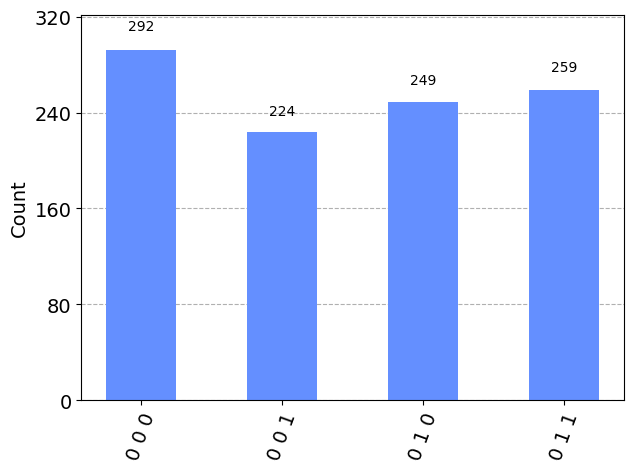

In [27]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

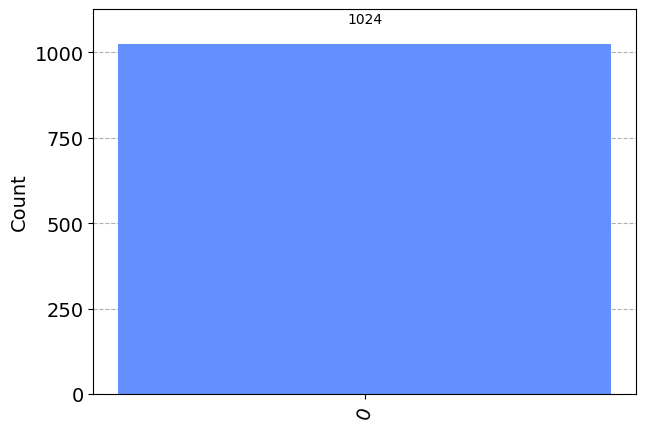

In [28]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

Superdense coding


Superdense coding is a protocol that, in some sense, achieves a complementary aim to teleportation. Rather than allowing for the transmission of one qubit using two classical bits of communication (at the cost of one e-bit of entanglement), it allows for the transmission of two classical bits using one qubit of quantum communication (again, at the cost of one e-bit of entanglement).

Qiskit implementation

In [34]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


In [40]:
from qiskit_aer.primitives import Sampler


ImportError: cannot import name 'BaseEstimatorV2' from 'qiskit.primitives.base' (C:\Users\binu\anaconda3\envs\qiskit\Lib\site-packages\qiskit\primitives\base\__init__.py)

In [37]:
from qiskit.visualization import plot_histogram